In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [57]:
df = pd.read_csv('Dataset/Train.csv')
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [58]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode())

In [59]:
le = LabelEncoder()
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content']) 
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Item_Outlet_Sales'] = le.fit_transform(df['Item_Outlet_Sales'])




In [60]:
x = df.drop(columns='Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']
x.head()


Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 1         0.016047          4   
1                8         5.92                 2         0.019278         14   
2              662        17.50                 1         0.016760         10   
3             1121        19.20                 2         0.000000          6   
4             1297         8.93                 1         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            3   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  
0                     0            1  
1                     2            2  
2                     0            1  
3                     2            0  
4                     2            1

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    # "XGBoost": XGBRegressor(),
    # "LightGBM": LGBMRegressor()
}


In [63]:
results = {}
col  = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']
input_values = []
names = []

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\

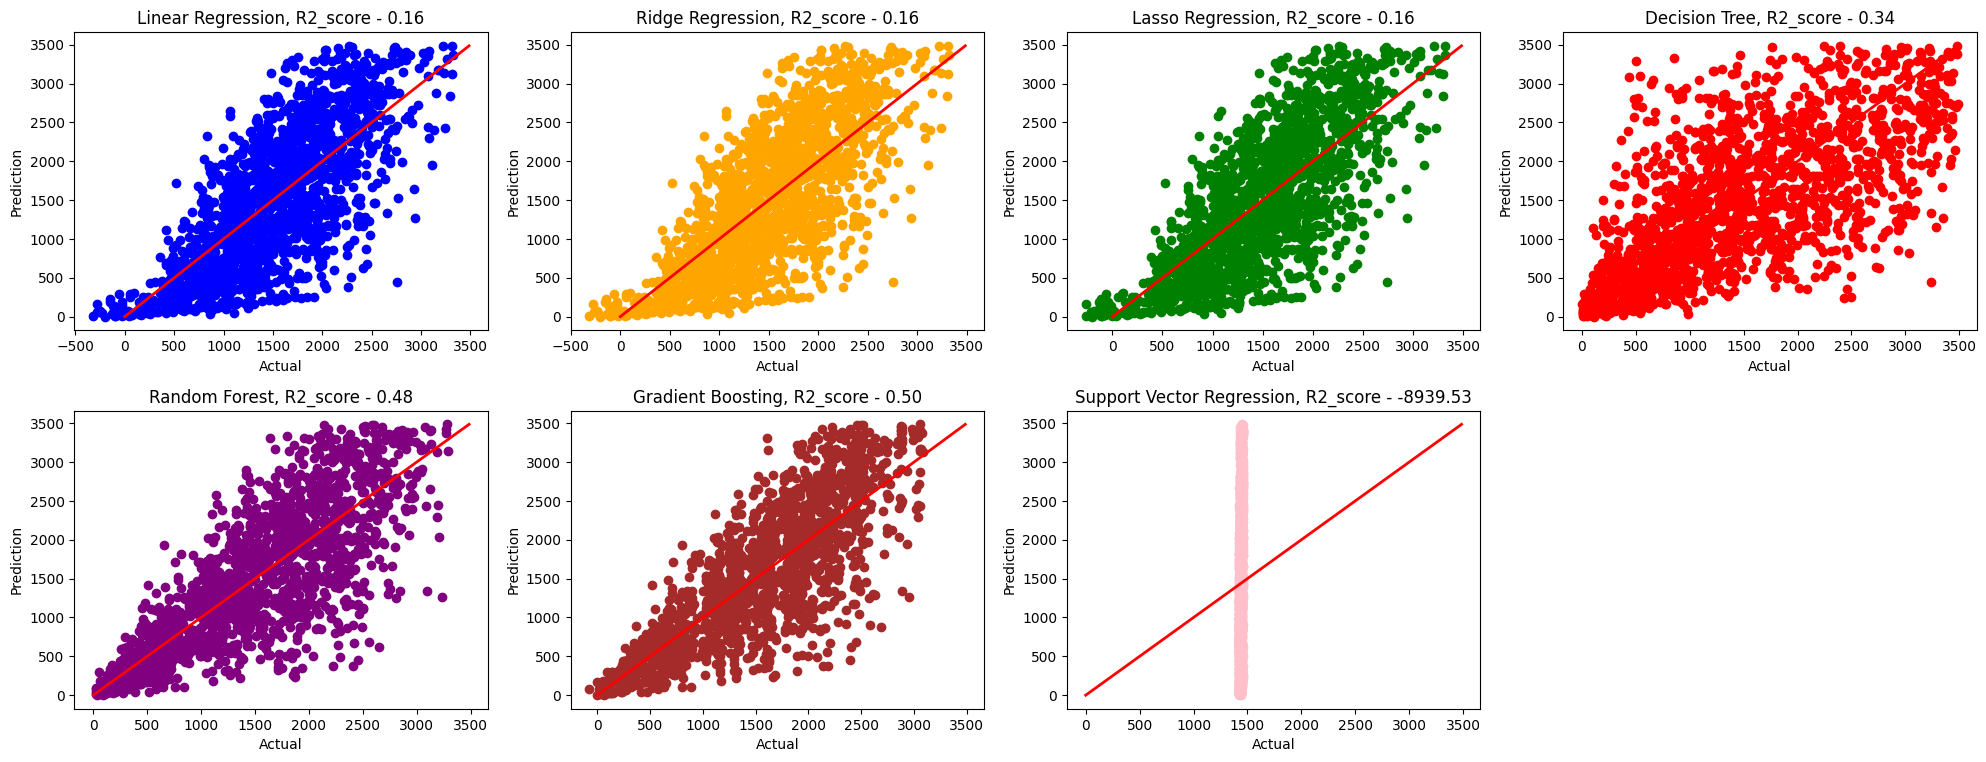

In [64]:
plt.figure(figsize=(20, 30))


for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    r2 = r2_score(y_pred, y_test)

    a = [[256,	8.30	,0	,0.026047,	3,	449.8092	,2	,2999,	0	,1,	0]]

    input_values.append(model.predict(a))
    names.append(name)
    results[name] = {
        'Mean absolute error': mae,
        'Mean square error': mse,
        'R2 score': r2
    }

    plt.subplot(8, 4, i)
    plt.scatter(y_pred, y_test, color=col[i-1])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f"{name}, R2_score - {r2:.2f}")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")

plt.tight_layout()
plt.show()

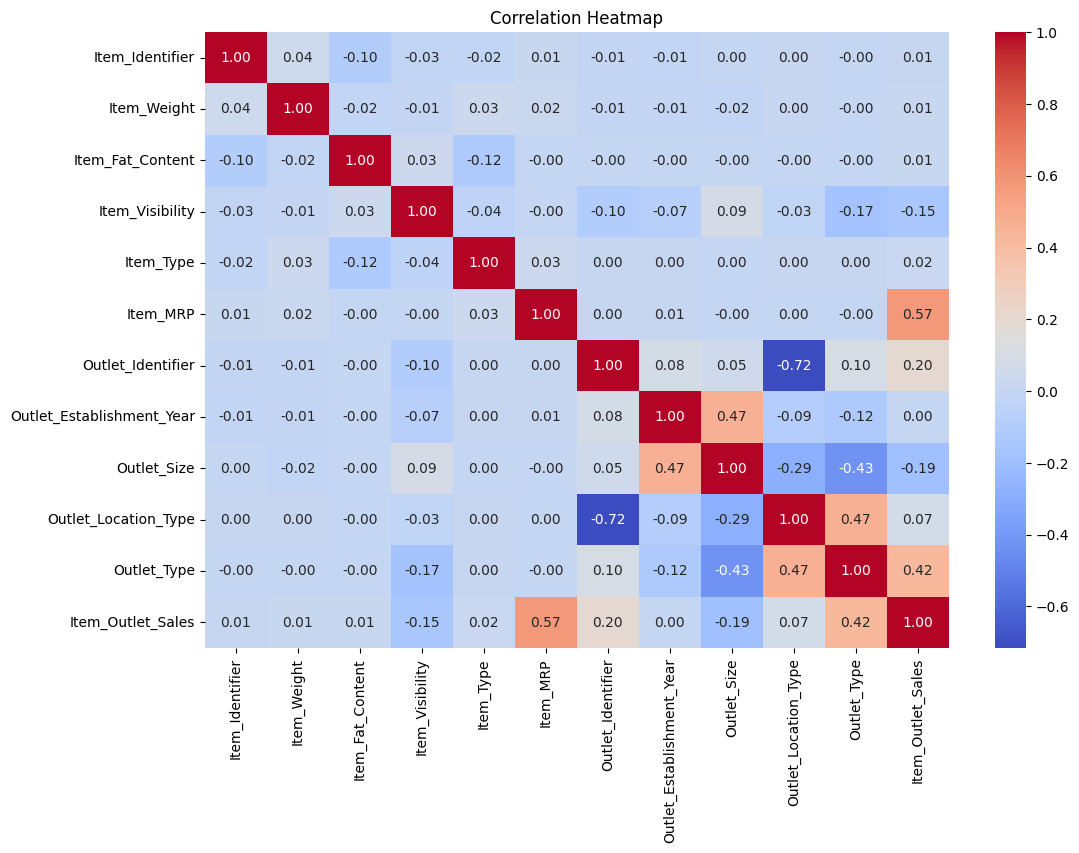

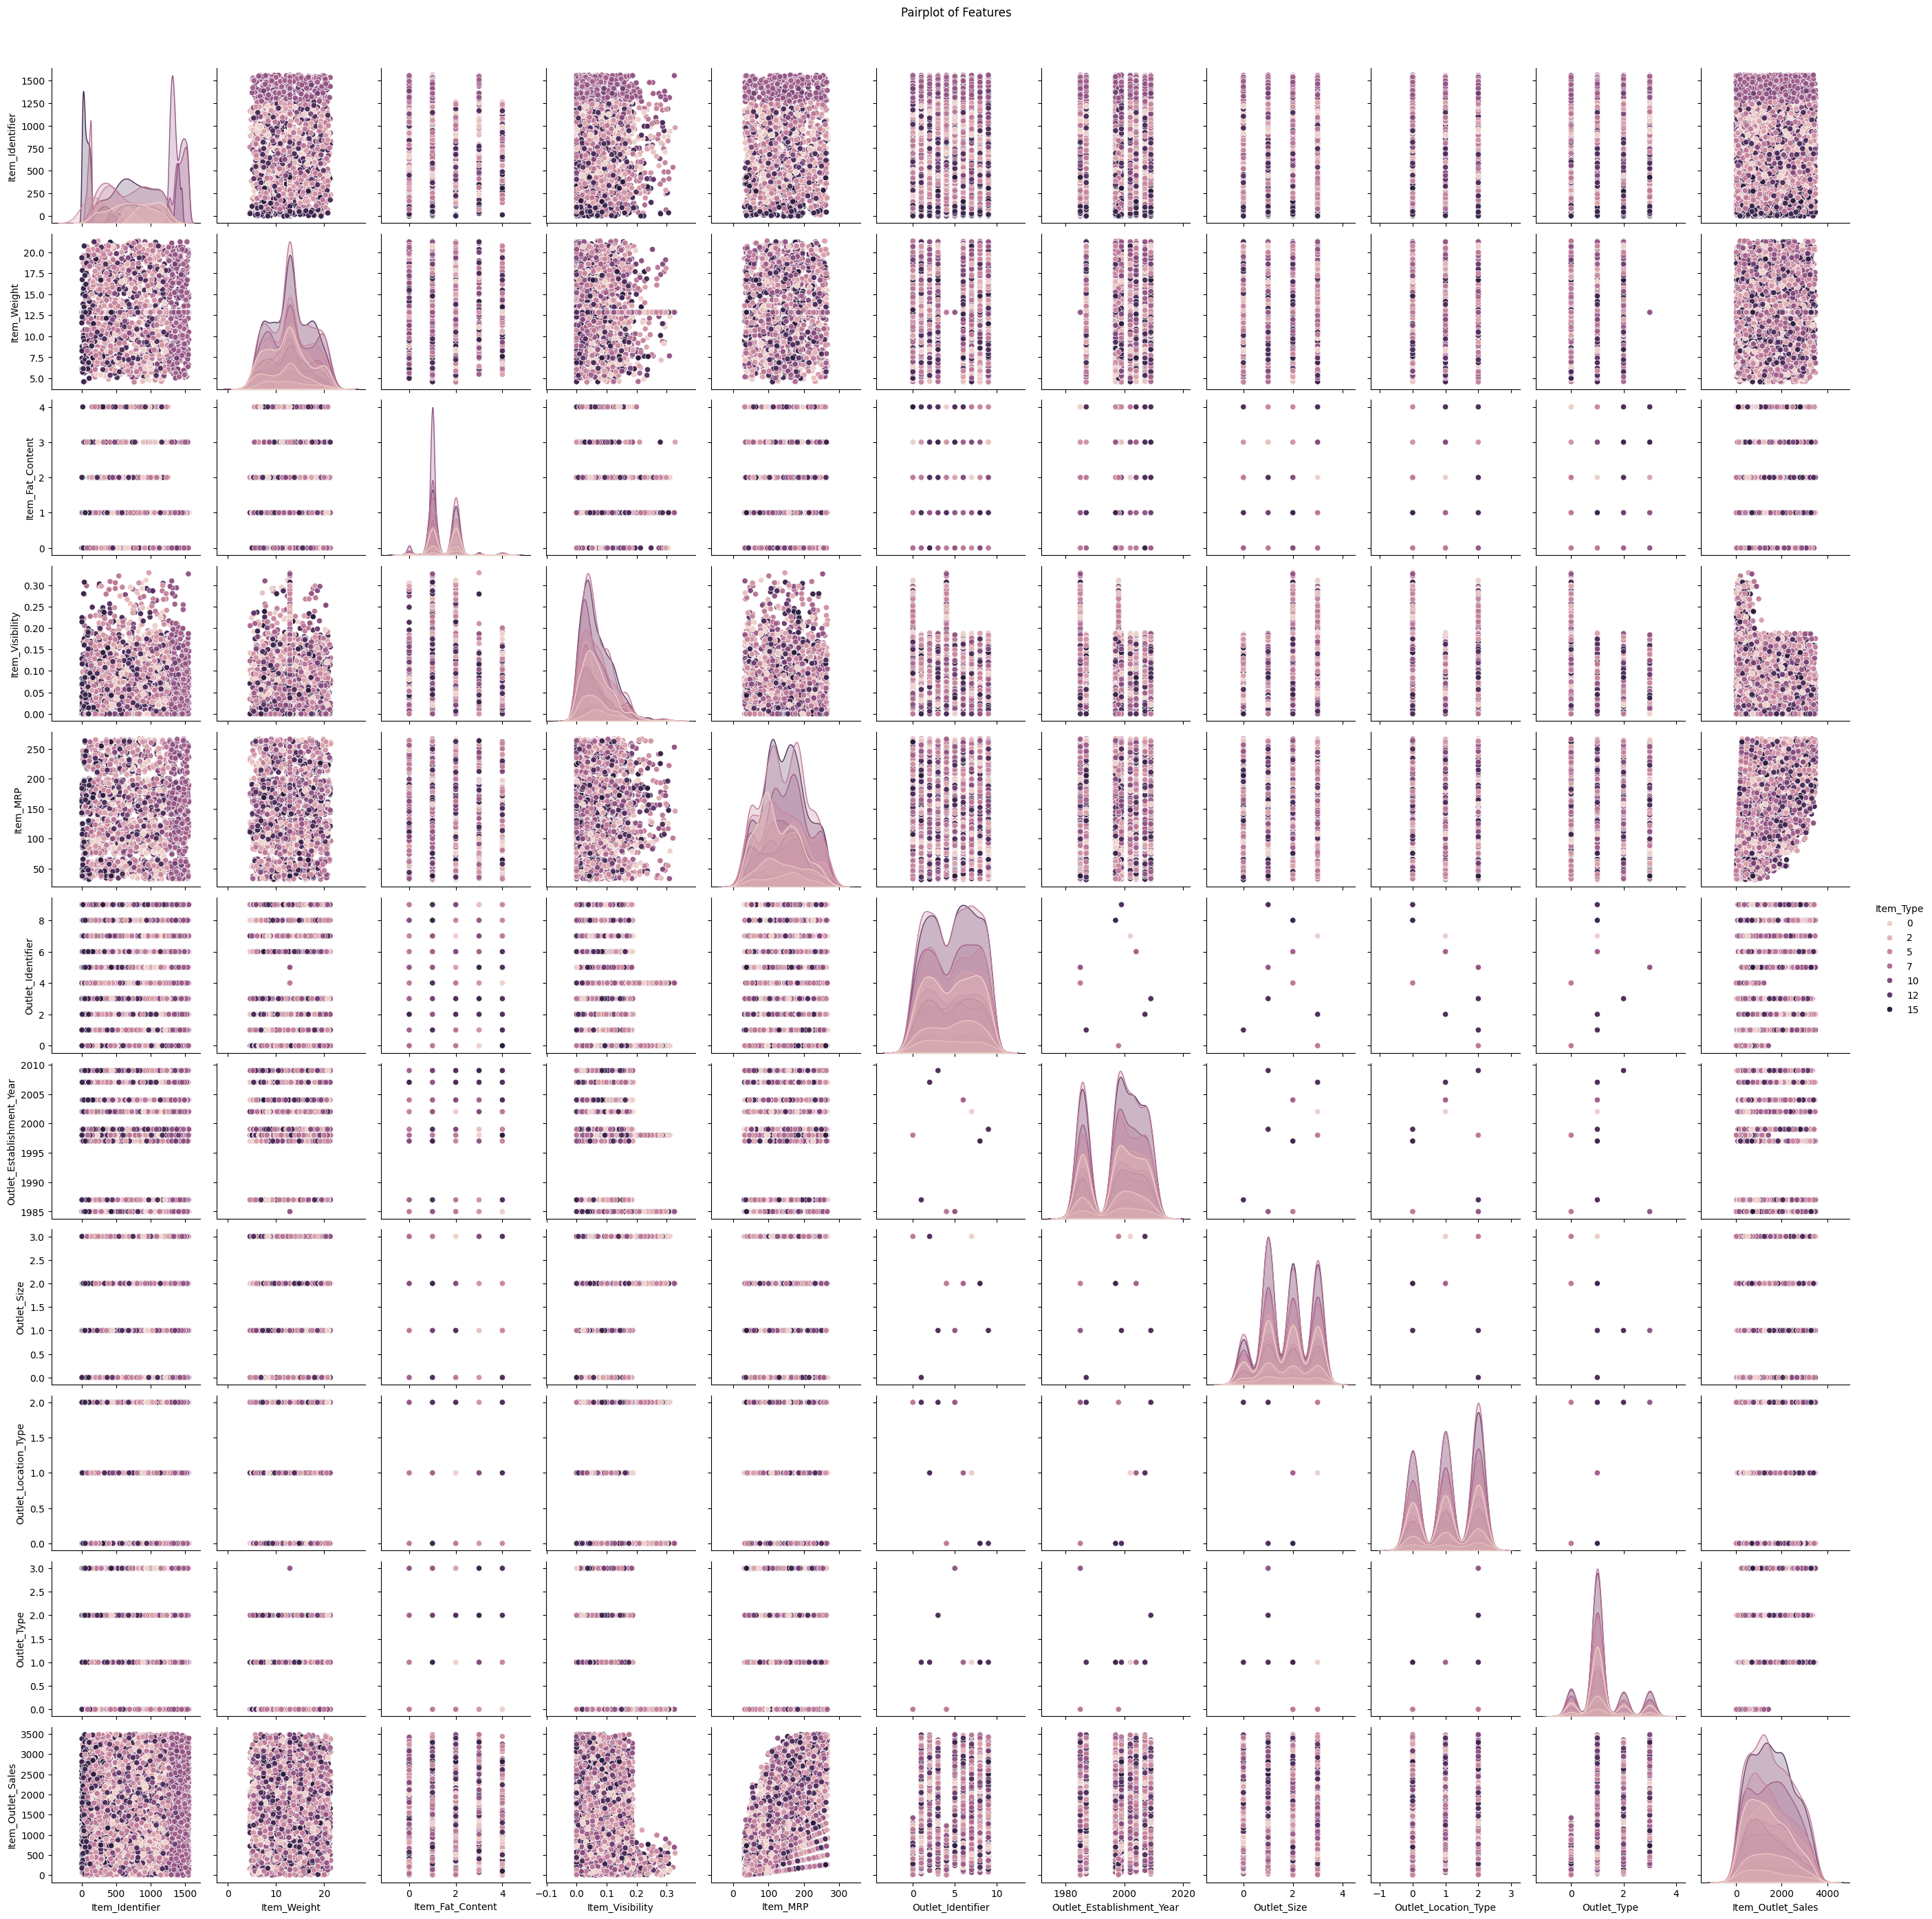

In [67]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df, diag_kind='kde', hue='Item_Type')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [68]:
result_df = pd.DataFrame(results).T
values = pd.DataFrame(input_values).T
values.columns = names

print(result_df)
print(values)

                           Mean absolute error  Mean square error     R2 score
Linear Regression                   481.576794      364563.181992     0.162588
Ridge Regression                    481.480486      364422.143024     0.162223
Lasso Regression                    481.558830      364164.268378     0.158289
Decision Tree                       554.688563      543421.099120     0.342408
Random Forest                       416.666487      302401.113841     0.479414
Gradient Boosting                   398.760552      272185.373614     0.499547
Support Vector Regression           763.522346      818199.316931 -8939.534257
   Linear Regression  Ridge Regression  Lasso Regression  Decision Tree  \
0        9130.615718       9178.882022       9286.431624          263.0   

   Random Forest  Gradient Boosting  Support Vector Regression  
0         464.01         592.123922                1454.251757  
